# Spotify Project: 
### Analysis of various metrics of songs from accousticness to liveness collected from Spotify Web API

By: Emily Wang and Marco Tortolani

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime

df = pd.read_csv("data.csv")
df["duration"]= df["duration_ms"] / 1000 #turns millisecond duration to second duration
df = df[df.popularity != 0]  # gets rid of filler popularity values that skew data
df

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,duration
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928,687.733
11,0.9890,"['Frédéric Chopin', 'Vladimir Horowitz']",0.170,85133,0.0823,0,6QIONtzbQCbnmWNwn0H1yT,0.911000,10,0.0962,-30.107,0,"Piano Sonata No. 2, Op. 35: IV. Finale. Presto",1,1928,0.0317,85.989,0.3460,1928,85.133
40,0.9770,"['Frédéric Chopin', 'Vladimir Horowitz']",0.305,215267,0.0830,0,6duqhjENDYbR2Q4Hpogh9M,0.697000,6,0.2310,-20.895,1,"Nocturne in F-Sharp Major, Op. 15, No. 2",1,1928,0.0331,80.622,0.0479,1928,215.267
42,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.337,333907,0.0699,0,6hUMURfCaJ6JB8EWL1ZLr7,0.903000,5,0.1060,-23.806,0,"Nocturne F Minor, Op. 55, No. 1",2,1928,0.0322,72.133,0.1350,1928,333.907
47,0.9850,"['Frédéric Chopin', 'Vladimir Horowitz']",0.355,138013,0.0452,0,6j8nMxm9yFxN3Mdodm9tEl,0.825000,1,0.1530,-24.125,1,"Mazurka in F Minor, Op. 7, No. 3",2,1928,0.0329,84.551,0.2760,1928,138.013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020,163.800
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020,167.468
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020,180.700
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020,167.308


# Popularity vs. Year Figure:
- Generates a scatterplot that displays all the data points of the year each song was released plotted against the song's popularity


Text(0.5, 1.0, 'Popularity vs. Year')

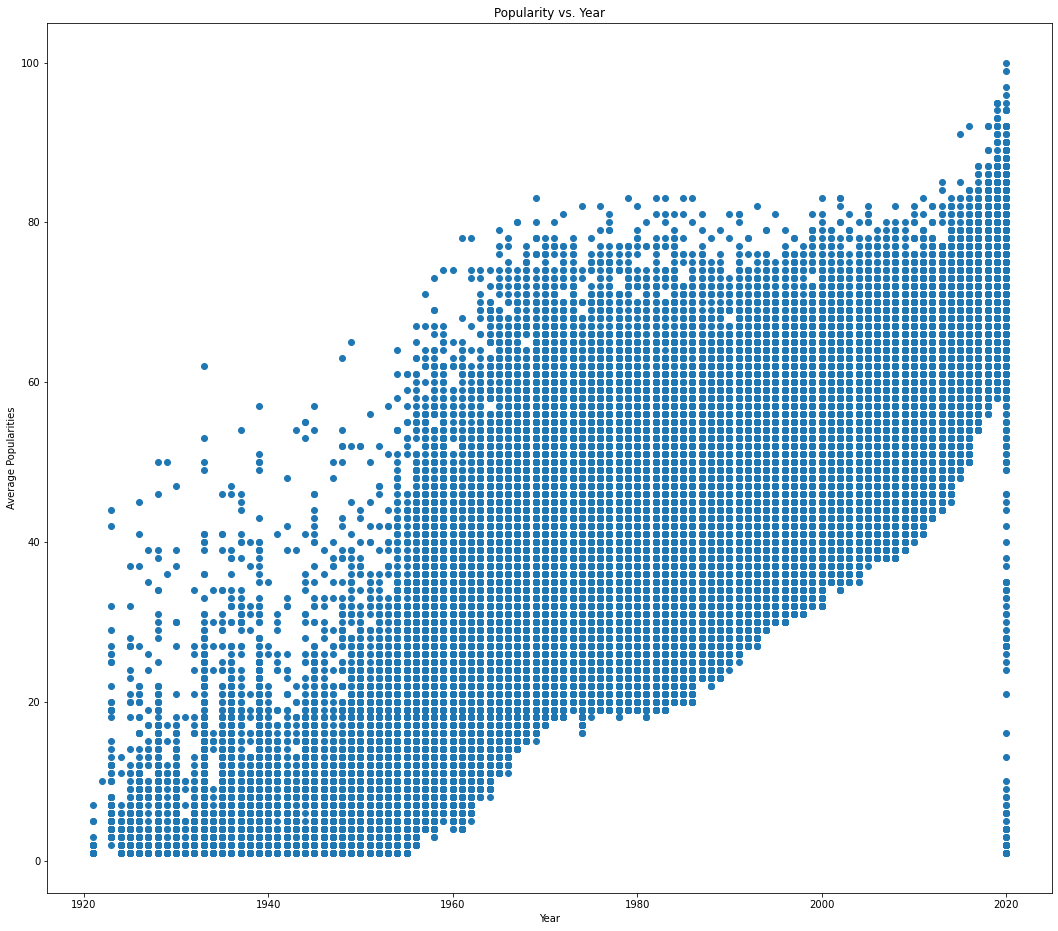

In [2]:
# Popularity vs. Year scatterplot
pop = df['popularity']
year = df['year']

plt.figure(figsize=(18,16))
plt.scatter(year, pop)
plt.xlabel("Year")
plt.ylabel("Average Popularities")
plt.title("Popularity vs. Year")


# Popularity vs. Year Figure (with Bins):
- Generates a bar chart plotting year in bins against the mean popularity for each bin
- Takes data used in graph above and groups data so that patterns are more easily discernible

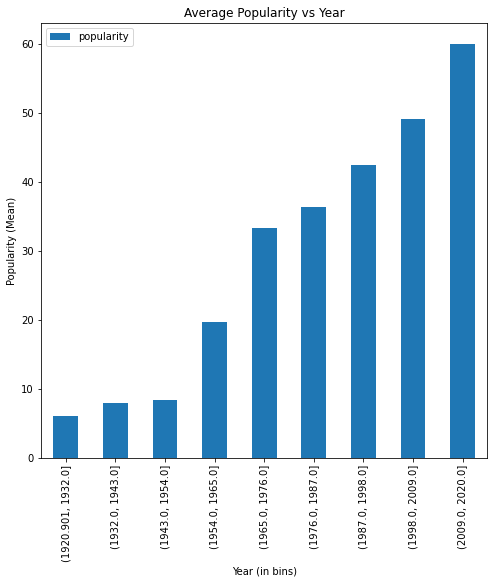

In [3]:
# places 90 years into 9 bins and concatenates popularity
df_compare = pd.concat([df["popularity"], pd.cut(df.year, 9)], axis=1) 
# groups average mean of each year bin
df_compare = df_compare.groupby(["year"]).mean() 
df_compare
    
from pylab import rcParams
rcParams['figure.figsize'] = 8, 8
df_compare.plot.bar(y='popularity')
plt.title('Average Popularity vs Year')
plt.xlabel('Year (in bins)')
plt.ylabel('Popularity (Mean)')
plt.show()
    

# Date_Optimizer Function:
- Finds the optimal month for an artist to release a song to acquire a relatively high popularity rating
- Also finds the optimal day in selected month to release a song

In [4]:
#input: dataframe, release month(jan=1,feb=2, ect.)
#output: bar chart of avg popularity by day & plot of avg popularity for day in release month.
def date_optimizer(dataframe, release_month=1):
    #turn the release_date column into its own month and day columns, kept as datetimes
    dataframe["month"] = pd.DatetimeIndex(dataframe["release_date"]).month
    dataframe["day"] = pd.DatetimeIndex(dataframe["release_date"]).day
    #group by the mean of month and day into new dataframes
    df_month = dataframe.groupby(by="month").mean()
    df_day = dataframe.groupby(by="day").mean()

    #combine month and day by turning the month into an integer and the day into a decimal
    dataframe["month_day"] = dataframe.month + dataframe.day / 100
    #find mean of the combined month_da
    df_month_day = dataframe.groupby(by="month_day").mean()



    #make new dataframe for whatever month is requested
    df_target_month = df_month_day[(df_month_day.index >= release_month) & (df_month_day.index < release_month+1)]

    #create 2 subplots
    #top is fixed avg populrity bar graph by month
    fig, ax = plt.subplots(2)
    ax[0].bar(df_month.index, df_month["popularity"], align="edge")
    ax[0].set_xticks(df_month.index)
    ax[0].set_title("Summary of Avg Popularity by Month")
    ax[0].grid()
    plt.subplots_adjust(hspace=0.5)
    #bottom is plot of avg popularity by day in selected month
    ax[1].plot(df_target_month.index, df_target_month["popularity"])
    ax[1].set_xticks(np.arange(min(df_target_month.index), max(df_target_month.index), 0.01))
    ax[1].tick_params(labelrotation=80)
    ax[1].set_title("Avg Popularity by Day in Month")
    ax[1].grid()


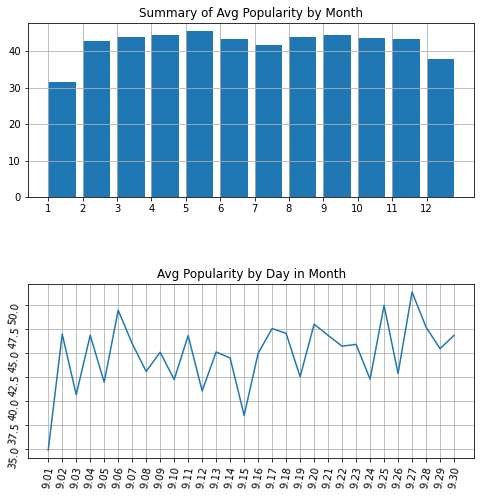

In [5]:
date_optimizer(df, 9)

# Highest_Popularity_Metric Function:
- Finds the value (depending on trait selected) that returns the highest popularity rating

In [6]:
#input: dataframe and trait we want to find the highest popularity for
#output: float value for the trait to achieve the highest possible popularity
def highest_popularity_metric(dataframe, trait):
    df_trait = dataframe[[trait, "popularity"]]
    # trait data split into 100 bins
    df_bins = pd.cut(df_trait[trait], 100, labels=[f"{i/100}-{(i+1)/100}" for i in range(100)]) 
    
    #combine the dataframe of bins into a column of the working dataframe
    df_trait.insert(2, f"{trait} bins", df_bins) 
    df_trait = df_trait.sort_values(by = f"{trait} bins")
    
    # Finds mean popularity of each bin
    pop_means = df_trait.groupby([f"{trait} bins"]).mean() 
    pop_means["popularity"]= pop_means["popularity"].fillna(0)
    # Finds the maximum mean popularity
    max_y = max(pop_means["popularity"])
    # Finds the x value associated with max popularity
    max_x = pop_means.loc[pop_means['popularity'] == max_y, trait].iloc[0] 
    
    return (max_x)

In [8]:
highest_popularity_metric(df, "acousticness")

0.014601644174111411

# Popularity_Grapher function:
- Generates a line graph plotting a specific trait against popularity
- Trait data is organized into bins and the mean popularity for each bin is calculated for increased efficiency

In [9]:
#input: dataframe, the trait you want to find the highest popularity of
#output: a graph of the trait vs its average popularity for each value of trait
def popularity_grapher(dataframe, trait):
    df_trait = dataframe[[trait, "popularity"]]
    
    #create bins for songs in the same range of trait values
    #what bin a song is in is in its own column
    df_bins = pd.cut(df_trait[trait], 100, labels=[f"{i/100}-{(i+1)/100}" for i in range(100)])
    df_trait.insert(2, f"{trait} bins", df_bins)
    df_trait = df_trait.sort_values(by = f"{trait} bins")

    #finds mean popularity of each bin
    pop_means = df_trait.groupby([f"{trait} bins"]).mean()

    plt.plot(pop_means[trait], pop_means["popularity"])
    plt.title(f"{trait} vs popularity")
    plt.xlabel(trait)
    plt.ylabel("popularity")


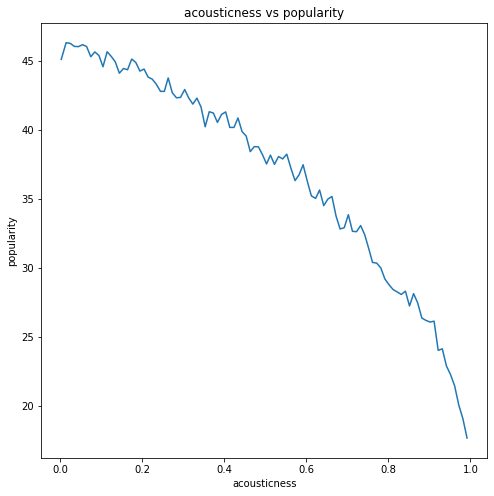

In [10]:
popularity_grapher(df, "acousticness")

# Popularity_Corr Function:
- Shows which trait (ex: energy, liveness) has the biggest impact on popularity and will likely produce the highest popularity rating
- Finds the correlation coefficient, or how closely two variables are correlated, between each trait and popularity and generates a bar chart


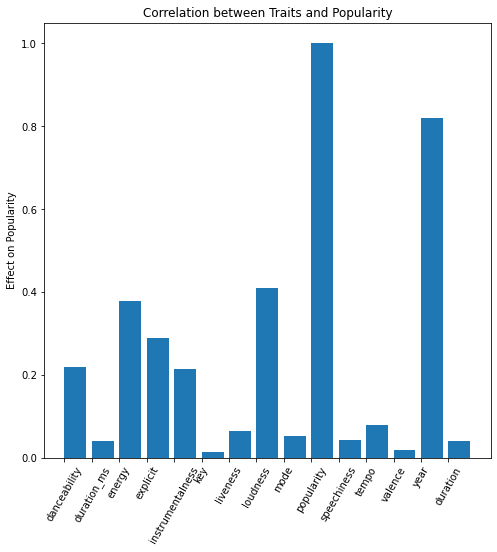

In [11]:
#input: the dataframe, the starting column, the ending column you want to analyze
#output: bar chart of selected column's coefficient of correlation to popularity
def popularity_corr(dataframe, start_col, end_col):
    #reads selected columns into new dataframe
    df_traits = dataframe.iloc[:, start_col : end_col]
    
    df_traits["popularity"] = dataframe["popularity"]
    df_traits["duration"] = dataframe["duration"]
    
    #find the absolute value of the correlation, which will always be between 0 and 1
    df_corr = df_traits.corr().abs()

    plt.bar(df_corr.index, df_corr["popularity"], align="edge")
    plt.xticks(rotation=60);
    plt.ylabel("Effect on Popularity")
    plt.title("Correlation between Traits and Popularity");
popularity_corr(df, 2, -4)

# Optimize_Trait function:
- Generates a line graph comparing any two traits
- One trait is the "optimized trait" because it is grouped into bins to find the mean of another trait
- you want to find what x value for x will give you the average mean y

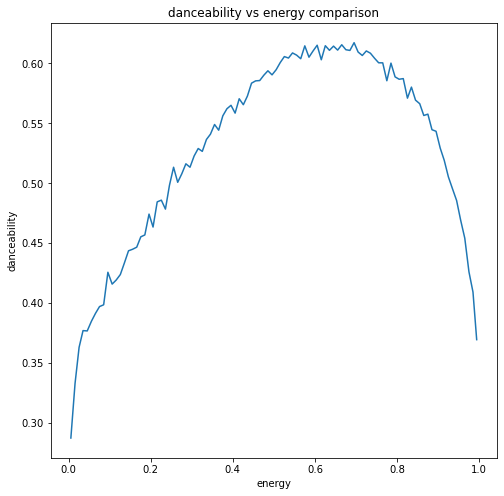

In [12]:
#input: dataframe, the trait you have as your base (op_trait), the trait you want to find the highest value for (trait_1)
#output: plot chart of compared traits
def optimize_trait(dataframe, op_trait, trait_1):
    df_trait = dataframe[[op_trait, trait_1]]
    
    #seperate x axis into seperate bins.
    df_bins = pd.cut(df_trait[op_trait], 100, labels=[f"{i/100}-{(i+1)/100}" for i in range(100)]) # splits optimized trait into 100 bins
    df_trait.insert(2, f"{op_trait} bins", df_bins)
    df_trait = df_trait.sort_values(by = f"{op_trait} bins")

    #find the means of each bin
    means = df_trait.groupby([f"{op_trait} bins"]).mean()
    
    plt.plot(means[op_trait], means[trait_1])
    plt.xlabel(op_trait)
    plt.ylabel(trait_1)
    plt.title(f"{trait_1} vs {op_trait} comparison")
    
optimize_trait(df, "energy", "danceability")

# Corr_Heatmap Function:
- Generates a heatmap that shows how strongly various traits correlate with each other

In [13]:
#input: dataframe, first column of traits, last column of traits
#output: heatmap
def corr_heatmap(dataframe, start_col, end_col):
    #take selected range of columns and turn them into a new dataframe
    df_traits = df.iloc[:, start_col : end_col]
    #find the correlation coefficient between each trait as a new dataframe
    #these are all absolute value'd, so the coefficients are between 0 and 1
    df_corr = df_traits.corr().abs()
    #create a blue heatmap of how strongly each factor correlates
    ax = sns.heatmap(df_corr, vmin=0, vmax=1, linewidths=0.5, cmap="Blues")
    ax.set(title="Correlation between Traits")


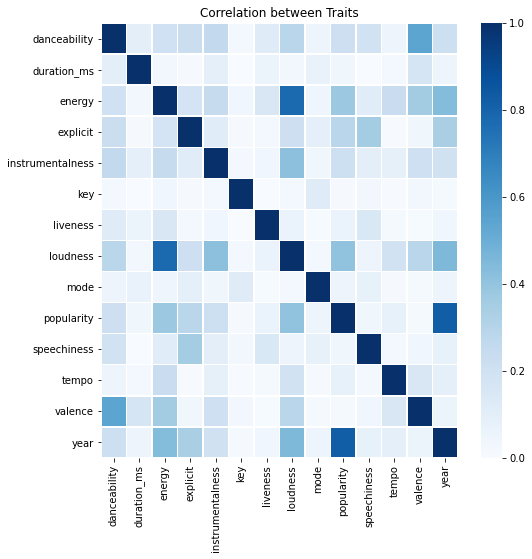

In [14]:
corr_heatmap(df, 2, -4)